In [1]:
import pandas as pd
import pprint as pp

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [4]:
from inc import stop_words as sw
from inc import extra_stopwords as esw
sw.STOP_WORDS = sw.STOP_WORDS.union(esw.common_stopwords)
sw.STOP_WORDS = sw.STOP_WORDS.union(esw.extra_stopwords)

In [5]:
from sqlalchemy import create_engine
table_name = 'Training_set_new'
db_path = 'db/training.sqlite'
db_path = 'sqlite:///' + db_path
engine = create_engine(db_path, echo=True)

In [6]:
df = pd.read_sql_table(table_name, engine)

2020-12-19 17:27:36,047 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-12-19 17:27:36,048 INFO sqlalchemy.engine.base.Engine ()
2020-12-19 17:27:36,049 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-12-19 17:27:36,050 INFO sqlalchemy.engine.base.Engine ()
2020-12-19 17:27:36,052 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2020-12-19 17:27:36,053 INFO sqlalchemy.engine.base.Engine ()
2020-12-19 17:27:36,054 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='view' ORDER BY name
2020-12-19 17:27:36,055 INFO sqlalchemy.engine.base.Engine ()
2020-12-19 17:27:36,057 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_xinfo("Training_set_new")
2020-12-19 17:27:36,057 INFO sqlalchemy.engine.base.Engine ()
2020-12-19 17:27:36,060 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master

In [7]:
df = df.rename(columns={"class": "label"})

In [8]:
df.shape

(1534, 4)

In [9]:
df = df.sample(frac=1).reset_index(drop=True) # randomize

In [10]:
train = df.sample(frac=0.8,random_state=200) #random state is a seed value
test = df.drop(train.index)

In [11]:
model = make_pipeline(TfidfVectorizer(stop_words=sw.STOP_WORDS), MultinomialNB())

In [12]:
model.fit(train.abstract, train.label)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(stop_words={'aderton', 'adertonde', 'adjö',
                                             'aldrig', 'allas', 'allt',
                                             'alltid', 'alltså', 'andra',
                                             'andras', 'annan', 'annat',
                                             'ansökan', 'arton', 'artonde',
                                             'att', 'av', 'avhandling',
                                             'bakgrund', 'bakom', 'bara',
                                             'behöva', 'behövas', 'behövde',
                                             'behövt', 'beslut', 'beslutat',
                                             'beslutit', 'bland', 'blev', ...})),
                ('multinomialnb', MultinomialNB())])

In [13]:
labels = model.predict(test.abstract)

In [14]:
pp.pprint(labels)

array(['2', '15', '17', '11', '11', '8', '4', '16', '7', '8', '17', '17',
       '17', '17', '17', '10', '17', '11', '12', '4', '8', '3', '15',
       '15', '7', '2', '11', '16', '17', '8', '3', '11', '17', '17', '12',
       '11', '2', '11', '10', '2', '15', '2', '12', '17', '7', '17', '15',
       '17', '16', '13', '17', '7', '17', '17', '17', '14', '17', '3',
       '7', '17', '12', '17', '17', '17', '17', '17', '7', '2', '15',
       '10', '3', '15', '7', '11', '14', '17', '17', '8', '7', '17', '14',
       '2', '15', '4', '17', '17', '13', '13', '10', '10', '17', '17',
       '15', '14', '3', '13', '16', '12', '8', '15', '2', '16', '17', '2',
       '12', '17', '16', '7', '15', '8', '12', '17', '16', '3', '11', '7',
       '3', '16', '2', '15', '17', '3', '13', '12', '7', '17', '4', '12',
       '17', '7', '15', '15', '12', '17', '3', '17', '9', '10', '10',
       '11', '12', '12', '7', '7', '17', '8', '16', '7', '17', '10', '17',
       '7', '8', '17', '11', '12', '13', '11', '7'

In [15]:
test = test.drop(columns=['index'])

In [16]:
test = test.reset_index(drop=True)

In [17]:
test

,abstract,label,len
0,när djur flytta till en ny miljö kunna brista ...,2,1169
1,klimatförändring och extrem väderhänderlse sås...,15,1309
2,ha vara att sprida kunskap om teknik metod o...,9,1473
3,vi stå inför en stor behov av en öka bygga en ...,11,880
4,människa fatta löpande beslut koppla till klim...,13,1364
...,...,...,...
302,syfta till att öka kunskap om marin skräp oc...,14,1369
303,genom att vända på en känd funktionalistisk fo...,11,1926
304,vi behöva höja produktivitet i sektorn och för...,9,1845
305,projekt huvudsaklig vilken vara att färdigst...,4,1496


In [18]:
confusion_mx = {}
for ix, label in enumerate(labels):
    if label == test.label[ix]:
        if label in confusion_mx:
            confusion_mx[label] += 1
        else:
            confusion_mx[label] = 1

In [19]:
conf_labels = list(map(str, list(range(2,18))))

In [20]:
print('test:', sorted(list(map(int, list(set(test.label))))))
print('pred:', sorted(list(map(int, list(set(labels))))))
print('conf:', conf_labels)

test: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
pred: [2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
conf: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17']


In [21]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.label, labels, labels=conf_labels)

In [22]:
pp.pprint(mat)

array([[16,  2,  0,  0,  0,  1,  0,  0,  0,  0,  2,  1,  0,  3,  0,  0],
       [ 2,  9,  0,  0,  0,  0,  2,  0,  1,  0,  2,  0,  1,  1,  1,  4],
       [ 0,  0,  4,  0,  0,  0,  1,  0,  1,  4,  1,  0,  0,  0,  1,  5],
       [ 0,  0,  0,  0,  0,  0,  2,  0,  2,  0,  0,  0,  0,  0,  0,  5],
       [ 0,  1,  0,  0,  2,  0,  0,  0,  0,  0,  1,  1,  0,  3,  0,  2],
       [ 0,  0,  0,  0,  0,  8,  1,  0,  0,  1,  1,  0,  0,  1,  0,  2],
       [ 0,  3,  0,  0,  0,  2,  3,  1,  2,  0,  1,  0,  0,  0,  3,  4],
       [ 0,  0,  0,  0,  0,  3,  2,  2,  0,  2,  4,  0,  0,  1,  2,  9],
       [ 0,  1,  1,  0,  0,  4,  0,  0,  6,  0,  0,  0,  0,  0,  7,  6],
       [ 0,  2,  0,  0,  0,  1,  0,  1,  1, 11,  0,  1,  0,  1,  0,  2],
       [ 0,  0,  0,  0,  0,  3,  0,  0,  0,  0, 11,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  3,  2,  0,  1,  1,  0,  5,  0,  2,  1,  7],
       [ 0,  0,  0,  0,  1,  1,  1,  0,  1,  1,  2,  1,  5,  3,  1,  7],
       [ 0,  0,  1,  0,  1,  1,  0,  0,  0,  0,  3,

In [23]:
sorted_dict = dict(sorted(confusion_mx.items()))

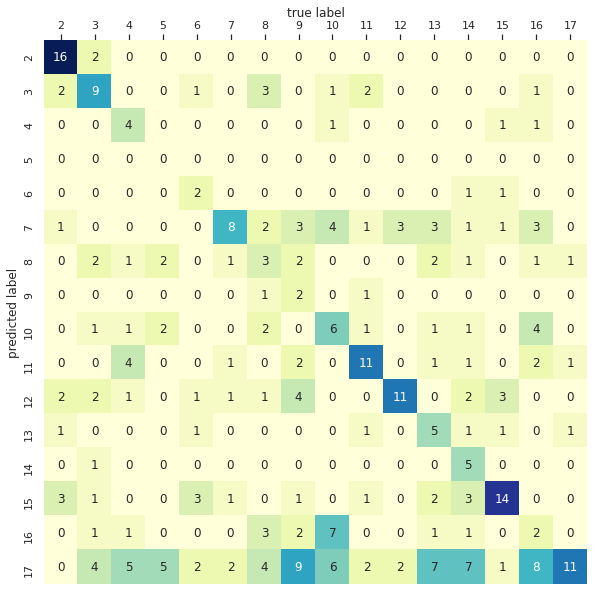

In [24]:
sns.set(style="white", color_codes=True)
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=conf_labels, yticklabels=conf_labels,cmap="YlGnBu")
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')

plt.xlabel('true label')
plt.ylabel('predicted label');

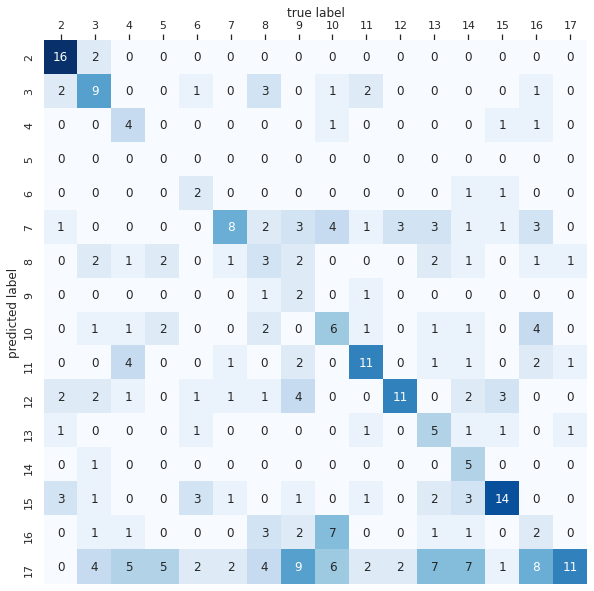

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=conf_labels, yticklabels=conf_labels,cmap="Blues")
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')

plt.xlabel('true label')
plt.ylabel('predicted label');

In [26]:
fig.savefig('img/heat_map_MultinomialNB.png')

In [27]:
from sklearn.metrics import classification_report

In [28]:
report = classification_report(test.label, labels, zero_division=0)
print(report)

              precision    recall  f1-score   support

          10       0.32      0.24      0.27        25
          11       0.48      0.55      0.51        20
          12       0.39      0.69      0.50        16
          13       0.45      0.23      0.30        22
          14       0.83      0.21      0.33        24
          15       0.48      0.64      0.55        22
          16       0.11      0.09      0.10        22
          17       0.15      0.79      0.25        14
           2       0.89      0.64      0.74        25
           3       0.47      0.39      0.43        23
           4       0.57      0.24      0.33        17
           5       0.00      0.00      0.00         9
           6       0.50      0.20      0.29        10
           7       0.27      0.57      0.36        14
           8       0.19      0.16      0.17        19
           9       0.50      0.08      0.14        25

    accuracy                           0.36       307
   macro avg       0.41   

In [29]:
report_dict = classification_report(test.label, labels, zero_division=0, output_dict=True)

In [30]:
report_df = pd.DataFrame.from_records(report_dict)

In [31]:
report_T = report_df.T.sort_index(na_position={'2', '17'})

In [33]:
report_T.to_csv (r'db/report_MultinomialNB.csv', index = True, header=True)